In [1]:
%matplotlib notebook
#Import Needed Modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#Read the file
df_canada = pd.read_excel('Canada.xlsx',
                         sheet_name="Canada by Citizenship",
                         skiprows=range(20),
                         skipfooter=2)

In [3]:
# Get summary of dataframe
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df_canada["Total"] = df_canada[range(1980,2014)].sum(axis=1)

In [5]:
df_canada_2 = df_canada.set_index('OdName')

In [6]:
df_canada_2.head()

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
OdName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,1,1,0,0,0,0,1,1,15


In [7]:
#Filter by countries
#df_canada.OdName

In [8]:
years = list(map(str, range(1980, 2014)))

In [9]:
df_canada_2.columns = list(map(str, df_canada_2.columns)) # to prevent ambiguity between index numbers and column names

In [10]:
df_canada_2.sort_values(['Total'], ascending=False, axis=0, inplace=True)

In [11]:
df_canada_2['2013'].head() # Immigration values for all countries in 2013

OdName
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [12]:
# Get values for frequency and bin ranges
count, bin_edges = np.histogram(df_canada_2['2013'])

print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


<IPython.core.display.Javascript object>


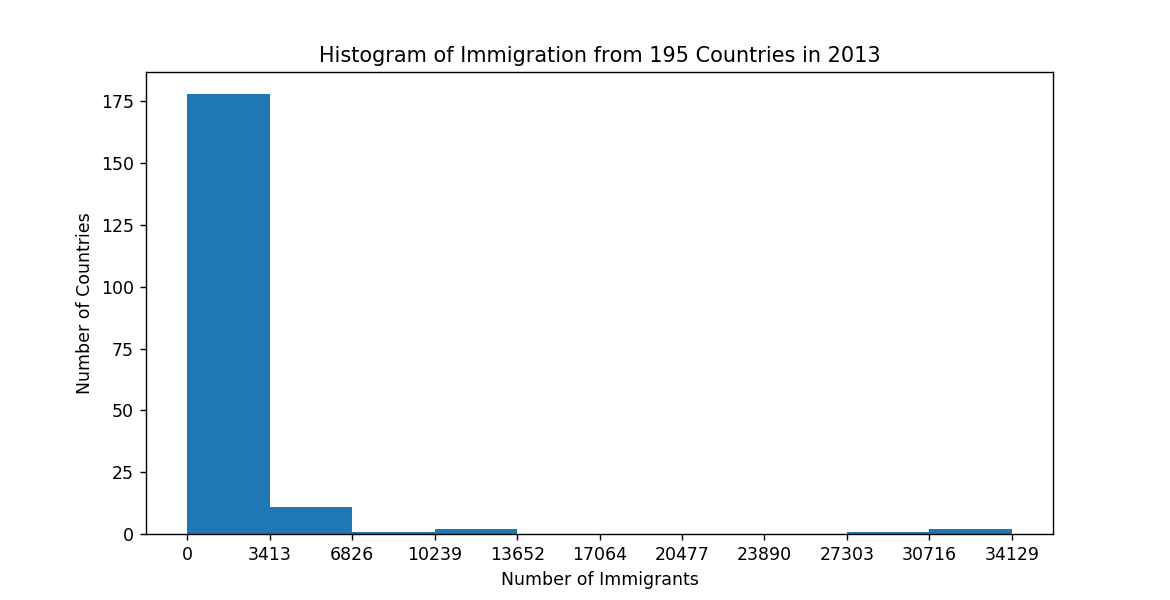

In [13]:
# Plot values

df_canada_2['2013'].plot(kind='hist', xticks=bin_edges )

plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants') 

plt.show()

# Sweden, Denmark and Norway Immigration Distribution totals

In [14]:
df_canada_2.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
OdName,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


In [15]:
df_Nordic = df_canada_2.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_Nordic.head()

OdName,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


In [16]:
count, bin_edges = np.histogram(df_Nordic, 15)

<IPython.core.display.Javascript object>


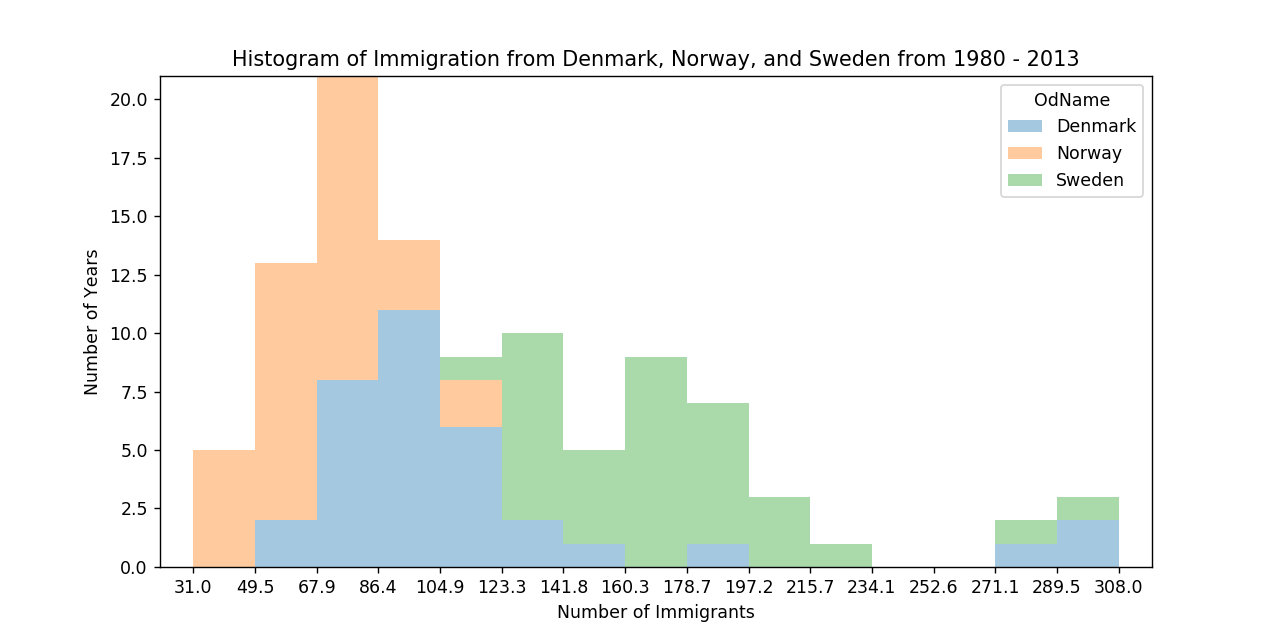

In [17]:
# Create Histogram
xmin = bin_edges[0] - 10 
xmax = bin_edges[-1] + 10

df_Nordic.plot(kind='hist',
              bins=15, # Set number of bins
              alpha=0.4, # Transparency
              xticks=bin_edges, # x-axis ticks
              xlim=(xmin, xmax), # Aesthetics
              stacked = True
              )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()